## HLCV assignment 1
### Hacane Hechehouche

[-15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2
   3   4   5   6   7   8   9  10  11  12  13  14  15]
[0.00088637 0.00158309 0.00271659 0.00447891 0.00709492 0.01079819
 0.01579003 0.02218417 0.02994549 0.03883721 0.04839414 0.05793831
 0.06664492 0.07365403 0.07820854 0.07978846 0.07820854 0.07365403
 0.06664492 0.05793831 0.04839414 0.03883721 0.02994549 0.02218417
 0.01579003 0.01079819 0.00709492 0.00447891 0.00271659 0.00158309
 0.00088637]


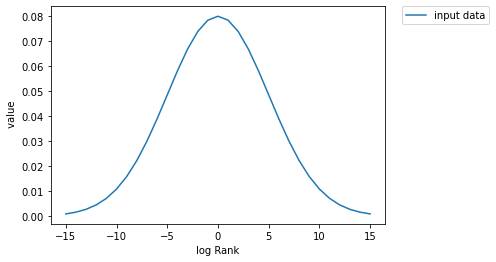

In [16]:
import numpy as np
import matplotlib.pyplot as plt
def gauss(sigma):
    
    xx= list(range(-3*sigma, 3*sigma+1))
    G=[]
    x= np.linspace(-3*sigma, 3*sigma, 3*2*sigma+1,dtype='int') 
    G=np.exp(-(x*x)/(2*(sigma*sigma)))/(sigma*np.sqrt(2*np.pi))
    
     
    return G,x

g,x= gauss(5)

print(x)
print(g)

plt.plot(x,g, label="input data")  # log log plot of the input data
 
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # the key of the graph
plt.ylabel(' value' )
plt.xlabel('log Rank')
plt.show()

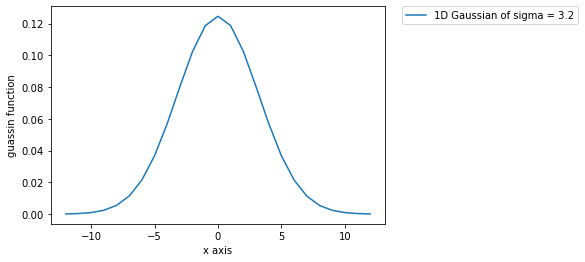

[1.10186151e-04 3.38735000e-04 9.44455636e-04 2.38831432e-03
 5.47759390e-03 1.13940104e-02 2.14957112e-02 3.67803160e-02
 5.70778392e-02 8.03355960e-02 1.02550303e-01 1.18728314e-01
 1.24669463e-01 1.18728314e-01 1.02550303e-01 8.03355960e-02
 5.70778392e-02 3.67803160e-02 2.14957112e-02 1.13940104e-02
 5.47759390e-03 2.38831432e-03 9.44455636e-04 3.38735000e-04
 1.10186151e-04]
[-12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5
   6   7   8   9  10  11  12]


In [14]:
import sys
sys.path.insert(0, './code/filter-Q1')
import gauss_module 
from importlib import reload
gauss_module = reload(gauss_module)
[G,x] = gauss_module.gauss(3.2)
print(G)
print(x)

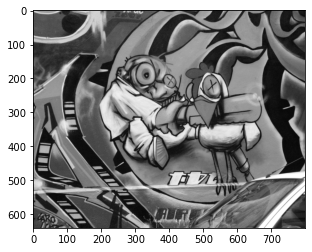

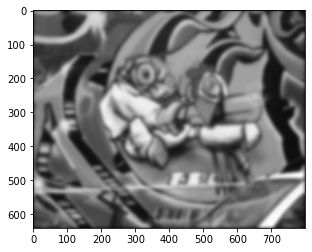

In [119]:
import scipy
import numpy as np
sigma=5
img= plt.imread("./code/filter-Q1/graf.png")
img=np.asarray(img)
greyImg =  np.dot(img[...,:3], [0.299, 0.587, 0.144])
kernel = np.outer(scipy.signal.windows.gaussian(3*2*sigma+1, sigma),scipy.signal.windows.gaussian(3*2*sigma+1, sigma))
blurredImg = scipy.signal.fftconvolve(greyImg, kernel, mode='same')
plt.figure()
plt.imshow(greyImg,cmap='gray')
plt.figure()
plt.imshow(blurredImg,cmap='gray')

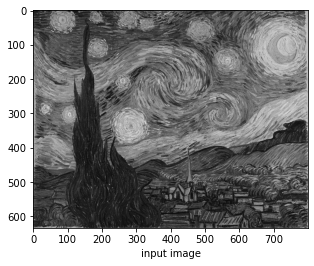

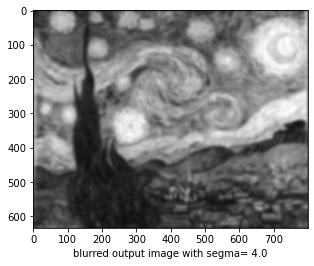

In [11]:
from scipy import signal
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, './code/filter-Q1')
from importlib import reload
import gauss_module 
gauss_module = reload(gauss_module)

img1= plt.imread("./code/filter-Q1/graf.png")
img2= plt.imread("./code/filter-Q1/kand.png")
img3= plt.imread("./code/filter-Q1/night.png")
sigma=4.0
outimage = gauss_module.gaussianfilter(img3,sigma)
 

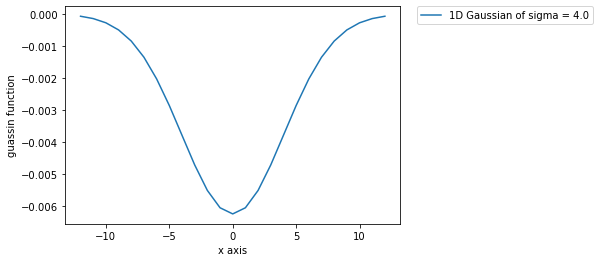

In [19]:
x= np.linspace(-3*math.ceil(sigma), 3*math.ceil(sigma), 3*2*math.ceil(sigma)+1,dtype='int') 
G=np.exp(-(x*x)/(2*(sigma*sigma)))/(-sigma*sigma*sigma*np.sqrt(2*np.pi))

plt.plot(x,G, label="1D Gaussian of sigma = " + str(sigma))  # log log plot of the input data
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) # the key of the graph
plt.ylabel('guassin function' )
plt.xlabel('x axis')
plt.show()

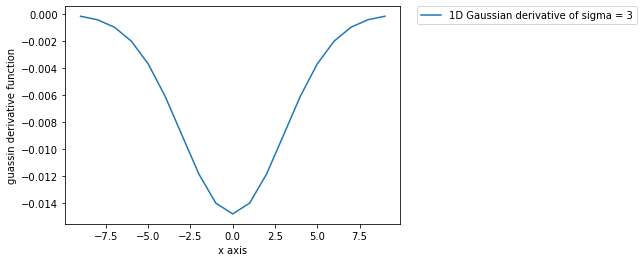

In [23]:
import sys
sys.path.insert(0, './code/filter-Q1')
import gauss_module 
from importlib import reload
gauss_module = reload(gauss_module)
[D,x] = gauss_module.gaussdx(3)

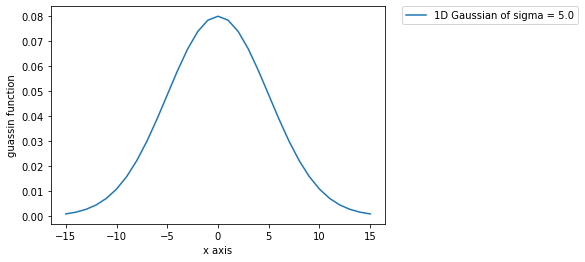

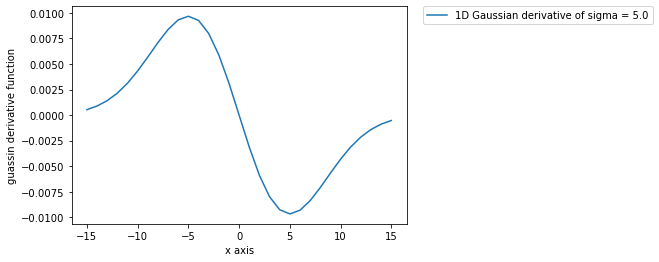

In [133]:
import sys
sys.path.insert(0, './code/filter-Q1')
import gauss_module 
from importlib import reload
gauss_module = reload(gauss_module)


imgImp = np.zeros((27,27))
imgImp[14,14] = 1.0
sigma = 5.0
G,x1 = gauss_module.gauss(sigma)
D,x2 = gauss_module.gaussdx(sigma)


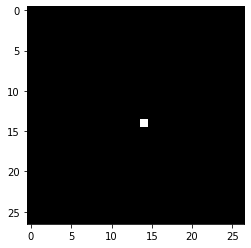

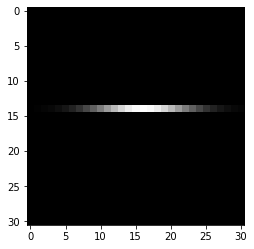

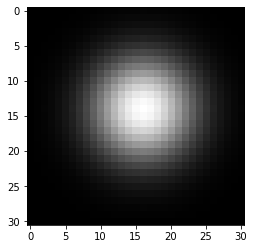

In [135]:
# first G, then GT 
plt.figure()
plt.imshow(imgImp,cmap='gray')
#imgImp_filtered = np.copy(imgImp)
imgImp_filtered=np.zeros((D.size,D.size))
for i in range(0,imgImp[:,1].size):
    imgImp_filtered[i,:] = np.convolve(imgImp[i,:], G, mode='same')
    #print(imgImp_filtered[:,i])
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
for i in range(0,imgImp_filtered[1,:].size):
    imgImp_filtered[:,i] = np.convolve(imgImp_filtered[:,i], G, mode='same')
    #print(imgImp_filtered[i,:])
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
 

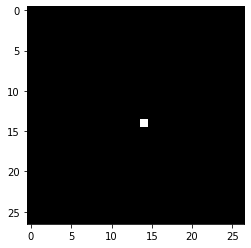

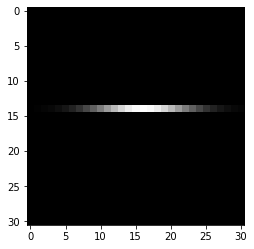

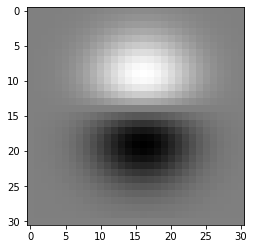

In [136]:
# first G, then DT 
plt.figure()
plt.imshow(imgImp,cmap='gray')
imgImp_filtered=np.zeros((D.size,D.size))
for i in range(0,imgImp[:,1].size):
    imgImp_filtered[i,:] = np.convolve(imgImp[i,:], G, mode='same')
    #print(imgImp_filtered[:,i])
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
for i in range(0,imgImp_filtered[1,:].size):
    imgImp_filtered[:,i] = np.convolve(imgImp_filtered[:,i], D, mode='same')
    #print(imgImp_filtered[i,:])
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
 

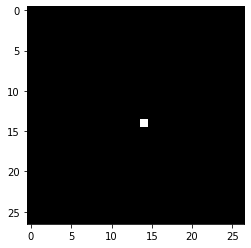

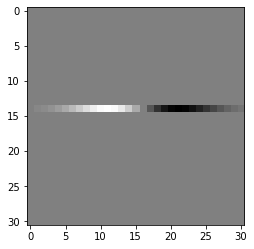

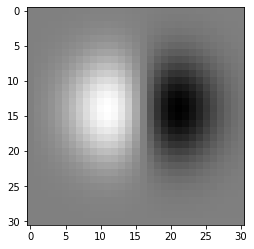

In [139]:
# first D, then GT 
plt.figure()
plt.imshow(imgImp,cmap='gray')
imgImp_filtered=np.zeros((D.size,D.size))
for i in range(0,imgImp[:,1].size):
    imgImp_filtered[i,:] = np.convolve(imgImp[i,:], D, mode='same')
  
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
for i in range(0,imgImp_filtered[1,:].size):
    imgImp_filtered[:,i] = np.convolve(imgImp_filtered[:,i], G, mode='same')
   
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
 

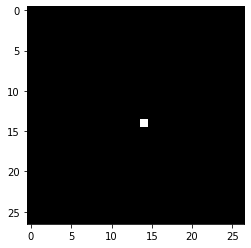

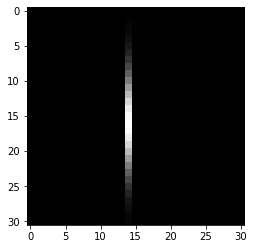

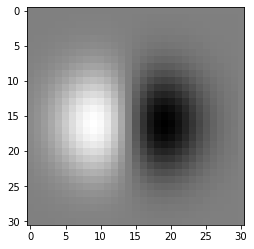

In [140]:
# first GT, then D
plt.figure()
plt.imshow(imgImp,cmap='gray')
imgImp_filtered=np.zeros((D.size,D.size))
for i in range(0,imgImp[1,:].size):
    imgImp_filtered[:,i] = np.convolve(imgImp[:,i], G, mode='same')

  
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
for i in range(0,imgImp_filtered[:,1].size):
    imgImp_filtered[i,:] = np.convolve(imgImp_filtered[i,:], D, mode='same')
   
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')

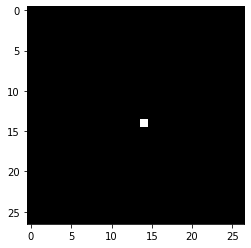

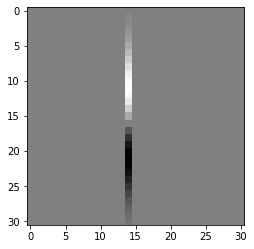

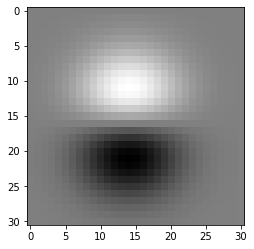

In [141]:
# first GT, then D
plt.figure()
plt.imshow(imgImp,cmap='gray')
imgImp_filtered=np.zeros((D.size,D.size))
for i in range(0,imgImp[1,:].size):
    imgImp_filtered[:,i] = np.convolve(imgImp[:,i], D, mode='same')

  
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')
for i in range(0,imgImp_filtered[:,1].size):
    imgImp_filtered[i,:] = np.convolve(imgImp_filtered[i,:], G, mode='same')
   
    
plt.figure()
plt.imshow(imgImp_filtered,cmap='gray')

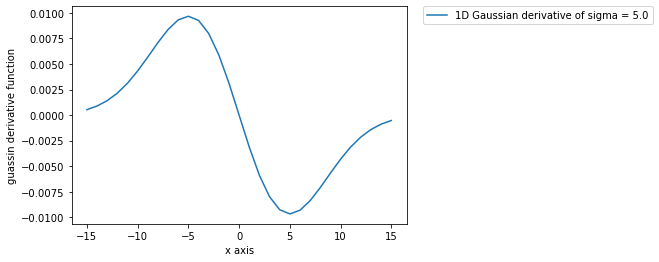

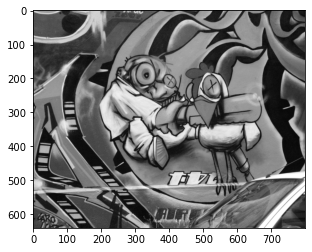

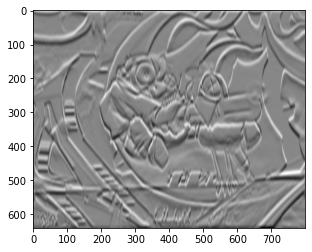

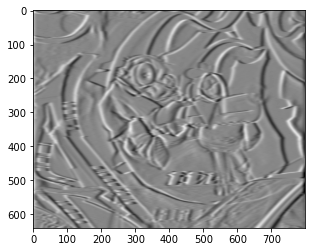

In [152]:
from scipy import signal
import numpy as np
import math
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, './code/filter-Q1')
from importlib import reload
import gauss_module 
gauss_module = reload(gauss_module)

img1= plt.imread("./code/filter-Q1/graf.png")
img2= plt.imread("./code/filter-Q1/kand.png")
img3= plt.imread("./code/filter-Q1/night.png")
sigma=5.0
imgDx, imgDy = gauss_module.gaussderiv(img1,sigma)





# derivative of images
